# **THE IMPORTANCE OF DATA**
---
<img src="http://www.doc.ic.ac.uk/~afd/images/logo_imperial_college_london.png" align = "left" width=200>
 <br><br><br><br>
 
- Copyright (c) Antoine Jacquier, 2022. All rights reserved

- Author: Jack Jacquier <a.jacquier@imperial.ac.uk>

- Platform: Tested on Windows 10 with Python 3.9

## Some topical data problems.....

### NHS COVID DATA October 2020
https://www.bbc.co.uk/news/uk-54422505

Run the following cell, first with N = 100, then with N = 1,100,000, and open the two csv files in Excel. What happens?

**1 million sample points are too large for Excel!**

In [1]:
import numpy as np
import csv

In [2]:
#N = 1000
N = 1100000
xx = np.random.normal(0.,1.,N)
fileName = "DataFile" + str(N) + ".csv"

with open(fileName, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Index", "X"])
    for (i,x) in enumerate(xx):
        writer.writerow([i, x])

Is N = 2 million a large number?

Let us look at FX data between GBP and EUR: https://www.truefx.com/truefx-historical-downloads/#66-67-january-1580847539

In [5]:
import pandas as pd
## I imported the file locally. You may want to check the path to file above
df = pd.read_csv("EURGBP-2022-01.csv", header = None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530534 entries, 0 to 1530533
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   0       1530534 non-null  object 
 1   1       1530534 non-null  object 
 2   2       1530534 non-null  float64
 3   3       1530534 non-null  float64
dtypes: float64(2), object(2)
memory usage: 46.7+ MB


Looking at the top five rows

In [6]:
df.head()

,0,1,2,3
0,EUR/GBP,20220102 22:06:10.134,0.83823,0.84273
1,EUR/GBP,20220102 22:06:51.626,0.83816,0.84274
2,EUR/GBP,20220102 22:06:51.627,0.83811,0.84275
3,EUR/GBP,20220102 22:06:52.627,0.83829,0.84189
4,EUR/GBP,20220102 22:06:52.839,0.83834,0.84183


Looking at the bottom five rows

In [7]:
df.tail()

,0,1,2,3
1530529,EUR/GBP,20220131 23:59:47.694,0.83514,0.83522
1530530,EUR/GBP,20220131 23:59:55.511,0.83510,0.83521
1530531,EUR/GBP,20220131 23:59:55.565,0.83510,0.83522
1530532,EUR/GBP,20220131 23:59:55.621,0.83515,0.83522
1530533,EUR/GBP,20220131 23:59:58.908,0.83517,0.83523


Cleaning and visualising (more on `pandas` and dataframe in another session)

<AxesSubplot:xlabel='Date'>

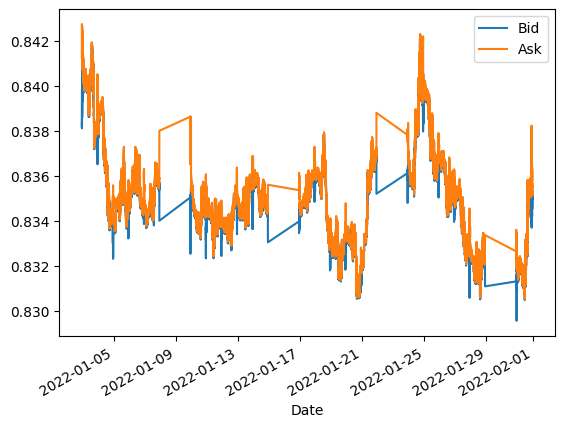

In [8]:
df = df.drop([0], axis=1)
df.columns = ["Date", "Bid", "Ask"]
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")
df[["Bid", "Ask"]].plot()

**Missing data during weekends leads to misleading linear trend!**

### Misleading Visualisation (often on purpose)

https://venngage.com/blog/misleading-graphs/

## Where to find data?

Internet is a goldmine for data. Not all data are free, but a large amount, on every topic, is (subject to copyright). We indicate below a few such sources that might be of interest in the context of Economics / Finance, as well as a few others (to broaden your horizons beyond the lure of the financial industry):
- <a href="https://docs.quandl.com/"> Quandl</a>:  vast collection of economic, financial, and market data collected from a wide variety of sources.
- <a href="https://trends.google.com/trends/?geo=UK"> Google Trends</a>
- Be careful with <a href="https://ico.org.uk/for-organisations/guide-to-data-protection/guide-to-the-general-data-protection-regulation-gdpr/key-definitions/what-is-personal-data/">Personal data</a> and <a href="http://www.oecd.org/sti/intellectual-property-statistics-and-analysis.htm">Intellectual property</a>. Legal issues may arise.... 

## `yahoo_fin`

`yahoo_fin` is a package to download lots of financial data on companies and traded stocks, indices, ...
https://pypi.org/project/yahoo-fin/

The functions in `yahoo_fin` are grouped into two modules:
- `stock_info`
- `options`

### The `stock_info` package

In [9]:
## %pip install yahoo_fin

In [10]:
import yahoo_fin.stock_info as si

In [11]:
aapl = si.get_data("aapl") # gets Apple's data
aapl.head()

,open,high,low,close,adjclose,volume,ticker
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099874,469033600,AAPL
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094663,175884800,AAPL
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087715,105728000,AAPL
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089886,86441600,AAPL
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092492,73449600,AAPL


In [12]:
aapl.tail()

,open,high,low,close,adjclose,volume,ticker
2022-11-17,146.429993,151.479996,146.149994,150.720001,150.720001,80389400,AAPL
2022-11-18,152.309998,152.699997,149.970001,151.289993,151.289993,74794600,AAPL
2022-11-21,150.160004,150.369995,147.720001,148.009995,148.009995,58724100,AAPL
2022-11-22,148.130005,150.419998,146.929993,150.179993,150.179993,51804100,AAPL
2022-11-23,149.449997,151.830002,149.339996,151.070007,151.070007,58237000,AAPL


You can also pull data for a specific date range, as follows:

In [14]:
si.get_data("amzn", start_date = "01/01/2017", end_date = "01/31/2017")

,open,high,low,close,adjclose,volume,ticker
2017-01-03,37.896000,37.938000,37.384998,37.683498,37.683498,70422000,AMZN
2017-01-04,37.919498,37.984001,37.709999,37.859001,37.859001,50210000,AMZN
2017-01-05,38.077499,39.119999,38.013000,39.022499,39.022499,116602000,AMZN
2017-01-06,39.118000,39.972000,38.924000,39.799500,39.799500,119724000,AMZN
2017-01-09,39.900002,40.088501,39.588501,39.846001,39.846001,68922000,AMZN
2017-01-10,39.830002,39.900002,39.477001,39.794998,39.794998,51168000,AMZN
2017-01-11,39.682999,39.974998,39.475498,39.951000,39.951000,59856000,AMZN
2017-01-12,40.015499,40.706501,39.974998,40.681999,40.681999,97478000,AMZN
2017-01-13,40.716000,41.082500,40.570000,40.856998,40.856998,75838000,AMZN
2017-01-17,40.785000,40.799999,40.172001,40.486000,40.486000,73410000,AMZN


**Question:** Why are 2017/01/01 and 2017/01/02 missing?

You can also get the list of all the tickers in the S&P 500:

In [15]:
listTickers = si.tickers_sp500()

In [16]:
len(listTickers)

503

You can get the live price

In [17]:
import numpy as np
n = np.random.randint(0, len(listTickers))

In [18]:
ticker = listTickers[n]
print(n, ticker)

43 APTV


In [19]:
si.get_live_price(ticker) 

106.91000366210938

You can also get a quote table

In [20]:
si.get_quote_table(ticker, dict_result = False)

,attribute,value
0,1y Target Est,119.45
1,52 Week Range,77.96 - 175.91
2,Ask,0.00 x 900
3,Avg. Volume,1878212.0
4,Beta (5Y Monthly),2.0
5,Bid,0.00 x 800
6,Day's Range,106.10 - 108.05
7,EPS (TTM),1.13
8,Earnings Date,"Nov 03, 2022"
9,Ex-Dividend Date,"Feb 04, 2020"


You can also look at Cryptocurrencies:

In [ ]:
si.get_top_crypto()

In [25]:
# most active stocks on the day
# si.get_day_most_active()
 
# best stocks
# si.get_day_gainers()
 
# worst stocks
si.get_day_losers()

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,PAGS,PagSeguro Digital Ltd.,10.2600,-1.7500,-14.57,15179000.0,3240000.0,3.382000e+09,13.86
1,FNMAI,Federal National Mortgage Association,1.9900,-0.3000,-13.10,41700.0,355.0,2.744000e+09,284.29
2,FNMAT,Federal National Mortgage Association,2.0500,-0.2300,-10.09,408277.0,54753.0,2.713000e+09,292.86
3,FNMAS,Federal National Mortgage Association,2.3600,-0.2400,-9.23,1248000.0,322585.0,2.987000e+09,337.14
4,OLK,Olink Holding AB (publ),22.0800,-1.9100,-7.96,160039.0,124041.0,2.630000e+09,NaN
5,SAPMD,Saipem SpA,0.2400,-0.0200,-7.69,28950.0,3667.0,2.394000e+09,NaN
6,STNE,StoneCo Ltd.,10.4400,-0.8000,-7.12,10243000.0,6139000.0,3.514000e+09,NaN
7,INSW,"International Seaways, Inc.",43.0500,-3.1800,-6.88,675411.0,662133.0,2.113000e+09,15.27
8,CS,Credit Suisse Group AG,3.8300,-0.2600,-6.36,21423000.0,18540000.0,1.002200e+10,NaN
9,DEN,Denbury Inc.,88.8400,-5.8600,-6.19,938294.0,804423.0,4.424000e+09,8.66


#### Scraping financial data

Financials, such as income statements, balance sheets, and cash flows can be scraped using `yahoo_fin`.

In [26]:
income_statement = si.get_income_statement(ticker)
balance_sheet = si.get_balance_sheet(ticker)
cash_flow = si.get_cash_flow(ticker)

income_statement
#print(balance_sheet)
#print(cash_flow)

endDate,2021-12-31,2020-12-31,2019-12-31,2018-12-31
Breakdown,,,,
researchDevelopment,None,None,None,None
effectOfAccountingCharges,None,None,None,None
incomeBeforeTax,710000000,1871000000,1141000000,1357000000
minorityInterest,214000000,195000000,192000000,211000000
netIncome,590000000,1804000000,990000000,1067000000
sellingGeneralAdministrative,1081000000,996000000,1103000000,1011000000
grossProfit,2438000000,1950000000,2649000000,2733000000
ebit,1209000000,810000000,1408000000,1598000000
operatingIncome,1209000000,810000000,1408000000,1598000000


#### Getting major stock holders

Getting the major holders of a stock can be done with the get_holders function.

In [27]:
holders = si.get_holders(ticker)

This returns a dictionary. We can check the keys:

In [28]:
holders.keys()

dict_keys(['Major Holders', 'Direct Holders (Forms 3 and 4)', 'Top Institutional Holders'])

and the values are `pandas` dataframes (another session).
We can return the top institutional holder:

In [29]:
info = holders["Top Institutional Holders"]
print("The top institutional hold is %s and owns %i dollars" %(info.Holder[0],info.Value[0]))

The top institutional hold is Vanguard Total Stock Market Index Fund and owns 853080462 dollars


Examples on other indices:

In [30]:
# get list of Dow stocks
dow_list = si.tickers_dow()
 
# get list of NASDAQ stocks
nasdaq_list = si.tickers_nasdaq()

### The `options` package

**FACT:** (most) options for indices are European, while (most) for single stocks are American.

In [31]:
from yahoo_fin import options

In [32]:
ticker = "amzn"

Get all the expirations date for the options on a given stock

In [33]:
maturities = options.get_expiration_dates(ticker)
maturities

['November 25, 2022',
 'December 2, 2022',
 'December 9, 2022',
 'December 16, 2022',
 'December 23, 2022',
 'December 30, 2022',
 'January 20, 2023',
 'February 17, 2023',
 'March 17, 2023',
 'April 21, 2023',
 'June 16, 2023',
 'July 21, 2023',
 'September 15, 2023',
 'October 20, 2023',
 'January 19, 2024',
 'June 21, 2024',
 'January 17, 2025']

Importing all the options on a given stock on a given maturity

In [34]:
chain = options.get_options_chain(ticker)
calls = chain["calls"]
puts = chain["puts"]
calls.tail()

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
83,AMZN221125C00155000,2022-11-11 10:25AM EST,155.0,0.01,0.0,0.01,0.0,-,3,330,218.75%
84,AMZN221125C00160000,2022-11-10 9:55AM EST,160.0,0.01,0.0,0.01,0.0,-,21,378,231.25%
85,AMZN221125C00165000,2022-11-10 3:43PM EST,165.0,0.01,0.0,0.01,0.0,-,1000,890,237.50%
86,AMZN221125C00170000,2022-11-03 10:29AM EST,170.0,0.01,0.0,0.01,0.0,-,1,345,250.00%
87,AMZN221125C00175000,2022-11-21 3:24PM EST,175.0,0.01,0.0,0.01,0.0,-,95,631,262.50%


In [35]:
si.get_live_price("amzn") 

94.12999725341797

To get the options for a specific maturity:

In [36]:
T = maturities[4]

In [37]:
allOptionsT = options.get_options_chain(ticker, T)
allCallsT = options.get_calls(ticker, T)
allPutsT = options.get_puts(ticker, T)

Getting the options for each maturity (*takes some time*)

In [ ]:
info = {}
#for date in maturities:
#    info[date] = options.get_options_chain(ticker, date)

------

**Alternative sources:**

Wharton Research for Data Services (WRDS), Option Metrics for options

## Quandl

Quandl (https://www.quandl.com/) is self-described as *"The premier source for financial, economic, and alternative datasets, serving investment professionals. Quandl's platform is used by over 400,000 people, including analysts from the world's top hedge funds, asset managers and investment banks."* Some of the data on Quandl is available to their institutional clients only, whereas other datasets are open to everyone.

Need to create an account (free) to get an api.

In [38]:
myapi = "nJnGN6QC8jt7ZMfJtkSV"

Data from quandl: for example, the Federal Reserve Economic Data (FRED):

* Natural Rate of Unemployment (Short-Term) (FRED/NROUST)
* Real Potential Gross Domestic Product (FRED/GDPPOT)
* Nominal Potential Gross Domestic Product (FRED/NGDPPOT)
* Natural Rate of Unemployment (Long-Term) (FRED/NROU)
* FOMC Summary of Economic Projections for the Civilian Unemployment Rate, Median (FRED/UNRATEMD)
* FOMC Summary of Economic Projections for the Growth Rate of Real Gross Domestic Product, Median (FRED/GDPC1MD)
* FOMC Summary of Economic Projections for the Personal Consumption Expenditures Inflation Rate, Median (FRED/PCECTPIMD)
* FOMC Summary of Economic Projections for the Personal Consumption Expenditures less Food and Energy Inflation Rate, Median (FRED/JCXFEMD)
* FOMC Summary of Economic Projections for the Fed Funds Rate, Range, Low (FRED/FEDTARRL)
* FOMC Summary of Economic Projections for the Fed Funds Rate, Range, Midpoint (FRED/FEDTARRM)
* FOMC Summary of Economic Projections for the Fed Funds Rate, Range, High (FRED/FEDTARRH)
* ...


Consider the Civilian Unemployment Rate (FRED/UNRATE): https://www.quandl.com/data/FRED/UNRATE-Civilian-Unemployment-Rate

In [ ]:
import quandl

data_unrate = quandl.get('FRED/UNRATE', api_key=myapi)

data_unrate.head()

In [ ]:
data_unrate['Value'].plot();

#### Question: is there a relationship between the unemployment rate and the value of the S&P 500?

In [40]:
import yahoo_fin.stock_info as si
import datetime as dt
import matplotlib.pylab as plt

snp500 = si.get_data("^GSPC")

In [41]:
snp500.head()

,open,high,low,close,adjclose,volume,ticker
1970-03-25,0.0,91.070000,88.110001,89.769997,89.769997,17500000,^GSPC
1970-03-26,0.0,90.650002,89.180000,89.919998,89.919998,11350000,^GSPC
1970-03-30,0.0,90.410004,88.910004,89.629997,89.629997,9600000,^GSPC
1970-03-31,0.0,90.169998,88.849998,89.629997,89.629997,8370000,^GSPC
1970-04-01,0.0,90.620003,89.300003,90.070000,90.070000,9810000,^GSPC


In [ ]:
snp500 = snp500.loc[dt.date(1990, 1, 1):]
data_unrate = data_unrate.loc[dt.date(1990, 1, 1):]

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(snp500.index, snp500['close'], color='green', label="S&P")
ax2 = ax1.twinx()
ax2.plot(data_unrate.index, data_unrate['Value'], color='red', label="Unemployment")
fig.tight_layout()
fig.subplots_adjust(bottom=0.2)
fig.legend(loc="upper left");

----------

## Alpha Vantage

Free API for real-time and historical stock and FX data, digital/crypto currency data, and many technical indicators

https://www.alphavantage.co/

It offers higher frequency data than Yahoo! Finance.

In [ ]:
##!pip install alpha_vantage

In [ ]:
myapi = "" ## you need to obtain (for free) an API on their website

Then, to download minute AAPL data,

In [ ]:
from alpha_vantage.timeseries import TimeSeries

ts = TimeSeries(key=myapi, output_format='pandas')

intraday_data, data_info = ts.get_intraday('AAPL', outputsize='full', interval='1min')

In [ ]:
data_info

In [ ]:
intraday_data.info()

In [ ]:
intraday_data.head()

In [ ]:
intraday_data['4. close'].plot(style=".")
plt.xticks(rotation=45)

## Webscraping

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

### Read data from webpage

In [ ]:
url = "https://en.wikipedia.org/wiki/BNP_Paribas"
content = requests.get(url).content
soup = BeautifulSoup(content,'html.parser')

In [ ]:
atags = soup.find_all("a") ## Viewing all data embedded in a tag

In [ ]:
## Extracts only the relevant table
table = soup.find_all(class_="wikitable")[0]
print("The html version of the table from the Wikipedia page reads: ")
print("**********************")
print(table.prettify()) ##  The prettify command adds indentation
print("**********************")

In [ ]:
index = [[th.text.strip() for th in tr.findChildren('th')] for tr in table.findChildren('tr')][0][1:]
data = [[td.text.strip() for td in tr.findChildren('td')] for tr in table.findChildren('tr')][1:]

In [ ]:
cols = [d[0] for d in data]
values = np.transpose([d[1:] for d in data])
df = pd.DataFrame (data = values, index = index, columns = cols)
df.head()

### Scraping for dynamic web content

Selenium

See also https://www.scrapingdog.com/blog/web-scraping-with-python/

## Data visualisation

### Matplotlib

Historically, the package of choice to visualise data in Python was matplotlib, introduced in 2003, and based on a MATLAB-like interface, and originally conceived to visualise Electrocorticography data of epilepsy patients.

https://matplotlib.org/

In [43]:
import matplotlib.pyplot as plt
import numpy as np

#### Simple plot

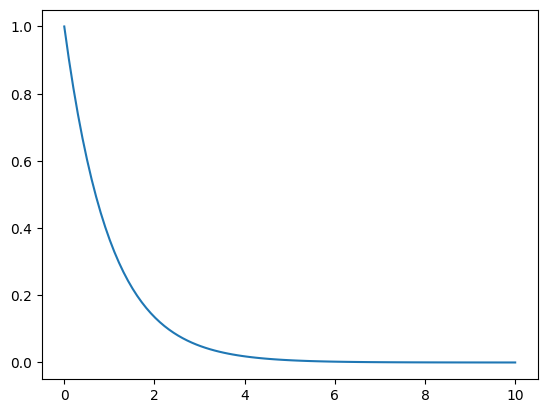

In [44]:
aa = np.linspace(0, 10, 100)
bb = np.exp(-aa)
plt.plot(aa, bb)
plt.show()

**Question: what is wrong with the graph?**

**No labels or titles!**

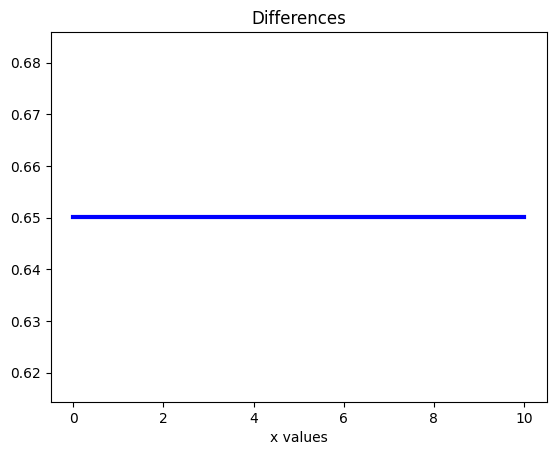

In [45]:
def f(x): 
    return np.exp(-x)
def g(x): 
    return np.exp(-x)+np.random.normal(0.,1)
aa = np.linspace(0, 10, 100)
bb = f(aa)
cc = g(aa)
dd = cc-bb
plt.plot(aa, dd, 'b', linewidth=3)
#plt.plot(aa, cc, 'r', linewidth=3)
plt.title('Differences')
#plt.title('Function $x \mapsto e^{-x}$')
plt.xlabel("x values")
plt.show()

**Bad scaling!** 

If you want to compare 2 graphs, not only plot the differences, but also what they originally look like.

#### Empirical histogram

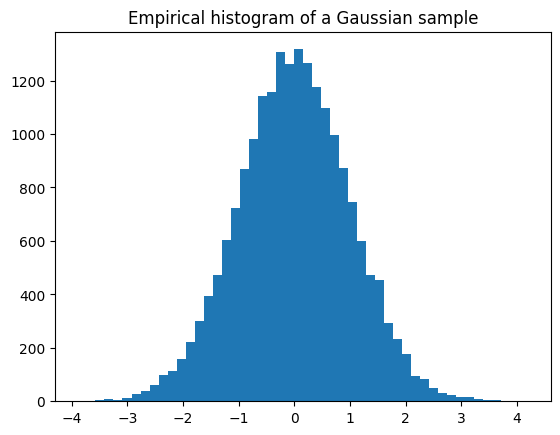

In [46]:
xx = np.random.normal(size=20000)

plt.hist(xx, bins=50)
plt.title('Empirical histogram of a Gaussian sample')
plt.show()

#### Scatter plot

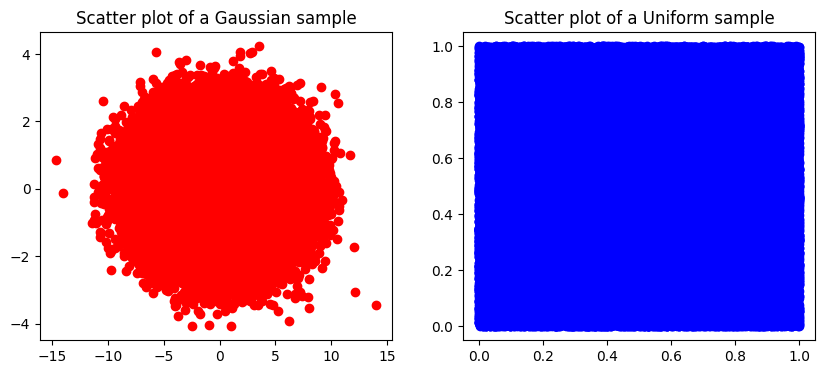

In [47]:
n = 100000
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
plt.subplot(1, 2, 1)
aa = np.random.normal(0., 3., n)
bb = np.random.normal(0., 1., n)
plt.scatter(aa, bb, color='r')
plt.title('Scatter plot of a Gaussian sample')

plt.subplot(1, 2, 2)
aa = np.random.rand(n)
bb = np.random.rand(n)
plt.scatter(aa, bb, color='b')
plt.title('Scatter plot of a Uniform sample')
plt.show()

#### 3D Plot

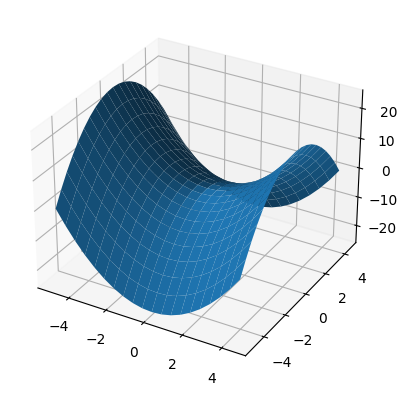

In [48]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
XX = np.arange(-5, 5, 0.5)
YY = np.arange(-5, 5, 0.5)
XX, YY = np.meshgrid(XX, YY)
ZZ = XX**2 - YY**2
surf = ax.plot_surface(XX, YY, ZZ, rstride=1, cstride=1)
plt.show()

### Seaborn

Seaborn, introduced in 2012, provides an application programming interface (API) on top of matplotlib, with similar tools, but that can be called directly from a pandas DataFrame.

https://seaborn.pydata.org/

#### Seaborn vs matplotlib

In [49]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

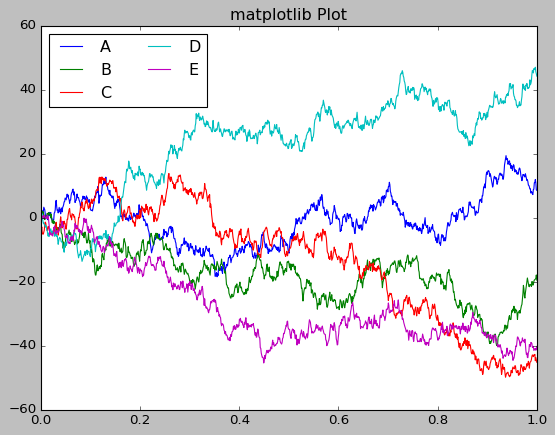

In [50]:
n, p = 1000, 5
xx = np.linspace(0., 1., n)
yy = np.cumsum(np.random.randn(n, p), axis=0)
plt.plot(xx, yy)
plt.legend('ABCDEF', ncol=2, loc="best")
plt.title("matplotlib Plot")
plt.show()

*Beware of legend location*

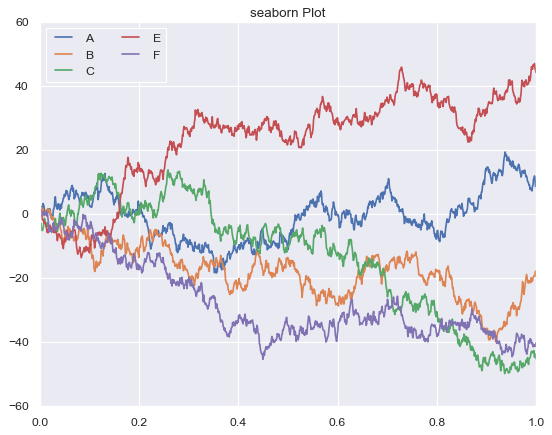

In [51]:
import seaborn as sns
sns.set()
# same plotting code as above!
plt.plot(xx, yy)
plt.legend('ABCEF', ncol=2, loc='upper left')
plt.title("seaborn Plot")
plt.show()

#### Seaborn tools

##### Histograms

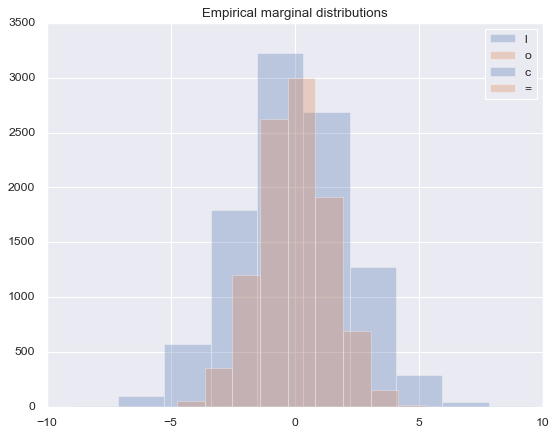

In [52]:
meanVector = [0., 0.]
covMatrix = [[5., 2.], [2., 2.]]
data = np.random.multivariate_normal(meanVector, covMatrix, size=10000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=False, alpha=0.3, label=col)
plt.legend('loc=best')
plt.title('Empirical marginal distributions')
plt.show()

/var/folders/zr/fgntnd8166vbjcz3v3pjw4cm0000gn/T/ipykernel_25997/1975029645.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True).set_title("Empirical marginal distributions")
/var/folders/zr/fgntnd8166vbjcz3v3pjw4cm0000gn/T/ipykernel_25997/1975029645.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True).set_title("Empirical marginal distributions")


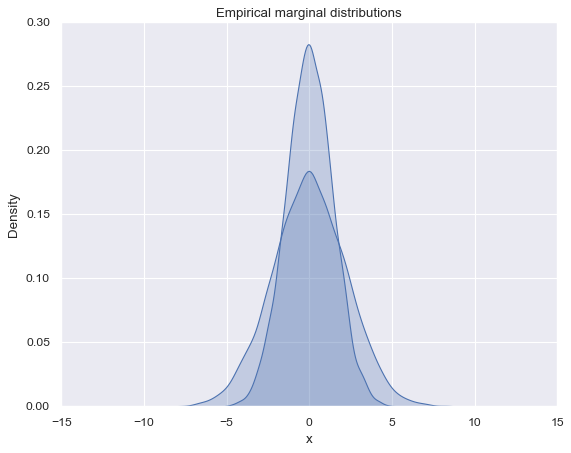

In [53]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True).set_title("Empirical marginal distributions")

https://seaborn.pydata.org/generated/seaborn.histplot.html

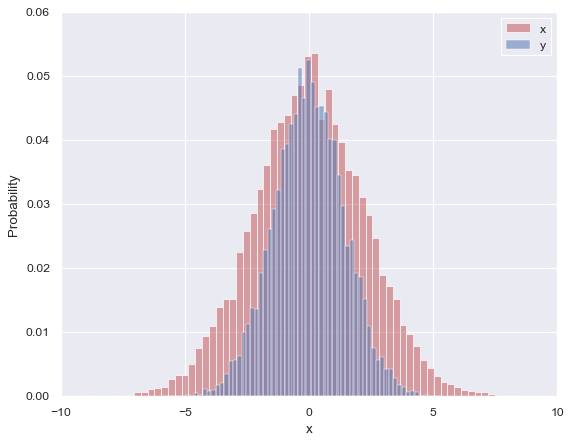

In [54]:
sns.histplot(data['x'], label='x', color="r", alpha=0.5, stat="probability")
sns.histplot(data['y'], label='y', color="b", alpha=0.5, stat="probability")
plt.legend(loc='best')
plt.show()

##### Visualising the data in 2D

In [ ]:
data.head()

In [ ]:
sns.kdeplot(data=data,x='x',y='y')

In [ ]:
with sns.axes_style('white'):
    sns.jointplot(x="x", y="y", data=data, kind='kde');

In [ ]:
with sns.axes_style('white'):
    sns.jointplot(x="x", y="y", data=data, kind='hex')

In [ ]:
### With a linear regression added
with sns.axes_style('white'):
    sns.jointplot(x="x", y="y", data=data, kind='reg')

### Plotly

Plotly provides online graphing, analytics, and statistics tools, as well as scientific graphing libraries.
https://plotly.com/

In [ ]:
## %pip install plotly

In [ ]:
import yahoo_fin.stock_info as si
aapl = si.get_data("aapl")
aapl.head()

In [ ]:
ax = aapl['close'].plot(legend=True)

In [ ]:
fig = ax.get_figure()
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode()
py.iplot_mpl(fig, strip_style=True)

Another type of plot in `plotly`:

In [ ]:
df = pd.read_excel('Class 2022-2023.xlsx')
## Disclaimer: randomly generated data
#df = df.set_index("ID")
df.head()

In [ ]:
variable = "Gender"
series = df.groupby(by=[variable]).count().mean(axis=1)
print(series.index)
print(series.values)

In [ ]:
trace0 = go.Bar(
        x=series.index,
        y=series.values,
        name='Last year')

data = [trace0]

layout = {
        'title': 'MSc Math Finance 2022-2023',
        'xaxis': {'title': variable},
        'yaxis': {'title': 'Number'},
        'barmode': 'stack'}

py.iplot({'data': data, 'layout': layout})

### Bokeh

`bokeh` helps you create interactive visualisations for modern web browsers.

https://docs.bokeh.org/

(likely origin: https://en.wikipedia.org/wiki/Bokeh)

In [ ]:
## %pip install bokeh

In [ ]:
import bokeh.plotting
import bokeh.io
import numpy as np

In [ ]:
bokeh.io.output_notebook()

In [ ]:
N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = ['#%02x%02x%02x' % (int(r), int(g), 150) for r, g in zip(np.floor(50+2*x), np.floor(30+2*y))]
p = bokeh.plotting.figure()
p.circle(x, y, radius=radii, fill_color=colors, fill_alpha=.5, line_color=None)
bokeh.plotting.show(p)

#### Slider's example

In [2]:
# import bokeh.plotting.figure as bk_figure
from bokeh.io import curdoc, show
from bokeh.layouts import row, widgetbox
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import Slider, TextInput
from bokeh.io import output_notebook # enables plot interface in J notebook

from bokeh.application import Application
from bokeh.application.handlers import FunctionHandler

# Set up data
n = 2000
xx = np.linspace(-2.*np.pi, 2.*np.pi, n)
yy = np.cos(xx)
source = ColumnDataSource(data=dict(x=xx, y=yy))

# Set up plot
plot = bk_figure(plot_height=400, plot_width=400, title="Jack's wave",
              tools="crosshair,pan,reset,save,wheel_zoom",
              x_range=[np.min(xx), np.max(xx)], y_range=[np.min(yy), np.max(yy)])

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

# Set up widgets
text = TextInput(title="title", value='Sin function')
offset = Slider(title="offset", value=0.0, start=-5.0, end=5.0, step=0.1)
amplitude = Slider(title="amplitude", value=1.0, start=-5.0, end=5.0, step=0.1)
phase = Slider(title="phase", value=0.0, start=0.0, end=2*np.pi)
freq = Slider(title="frequency", value=1.0, start=0.1, end=5.1, step=0.1)

# Set up callbacks
def update_title(attrname, old, new):
    plot.title.text = text.value

def update_data(attrname, old, new):
    # Get the current slider values
    a = amplitude.value
    b = offset.value
    w = phase.value
    k = freq.value

    # Generate the new curve
    newyy = a*np.sin(k*xx + w) + b

    source.data = dict(x=xx, y=newyy)

for w in [offset, amplitude, phase, freq]:
    w.on_change('value', update_data)

# Set up layouts and add to document
inputs = widgetbox(text, offset, amplitude, phase, freq)
layout = row(plot, widgetbox(text, offset, amplitude, phase, freq))

def modify_doc(doc):
    doc.add_root(row(layout, width=800))
    doc.title = "Sliders"
    text.on_change('value', update_title)

handler = FunctionHandler(modify_doc)
show(Application(handler))

ImportError: cannot import name 'widgetbox' from 'bokeh.layouts' (/opt/homebrew/lib/python3.9/site-packages/bokeh/layouts.py)

**Useful for analysing how BS option price changes with T, K, $\sigma$, etc.**

### Sweetviz

In [ ]:
##%pip install ipywidgets
##%pip install sweetviz
##%pip install IProgress

In [ ]:
import sweetviz as sv
analy = sv.analyze(aapl)
analy.show_html('analy.html')

There exist many visualisation tools, and we will only discuss a few, the most popular:
- `matplotlib` is a `Python` plotting library similar to MATLAB.
- `pyplot` is a shell-like interface to `matplotlib`
- `pylab` imports the `numpy` library, but is discouraged.

### Visualising time series

In [ ]:
ticker = "aapl"
df = si.get_data(ticker)#['open']
df=df.dropna()
df.head()

In [ ]:
df["open"].plot();

**Question**: What is wrong with the graph above?

In [ ]:
ticker = "aapl"
df = si.get_data(ticker, start_date = "01/01/2017")
df=df.dropna()

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
ax = df["open"].plot(figsize=(12, 5),fontsize=12,linewidth=3,linestyle='--')
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Value of Apple', fontsize=16)
ax.set_title("Evolution of Apple", fontsize=16)
ax.axvspan('2018-09-01', '2018-11-01', color='red', alpha=0.3)
ax.axvspan('2020-01-01', '2020-02-01', color='red', alpha=0.3)
ax.axvspan('2020-08-15', '2020-09-15', color='red', alpha=0.3)
plt.show()

***Clarity is key!!!***

#### Visualising correlations

Let's import all the daily data from the S&P500

In [ ]:
sp = si.tickers_sp500()
tickers = ["aapl", "amzn", "ba", "BRK.A", "bac", "V", "baba", "pypl", "xom", "hal", "slb", "csco", "intc", "orcl", "ko", "cl", "pg", "wmt"]
goodtickers = []
df = pd.DataFrame()

for t in tickers:
    try:
        dfTicker = si.get_data(t)
        dfTicker = dfTicker['open']
        df = pd.concat([df, dfTicker], axis=1)
        goodtickers.append(t)
    except:
        print("Ticker ", t, " not available")

df=df.dropna()
df.columns = goodtickers
df.head()

In [ ]:
import seaborn as sns

corrmat = df.corr(method='pearson')
np.round(corrmat, 2)

In [ ]:
plt.plot(corrmat, 'o');

In [ ]:
n = 10
corrmat_subset = corrmat.iloc[:n, :n]
corrmat_subset

In [ ]:
plt.plot(corrmat_subset, 'o');

In [ ]:
sns.heatmap(corrmat_subset);

In [ ]:
sns.clustermap(corrmat_subset, figsize=(5,5));

### Another example

Source: "https://www.udacity.com/api/nodes/4576183932/supplemental_media/chopstick-effectivenesscsv/download"

Article:
S.-H. Hsu, S.-P. Wu: "An investigation for determining the optimum length of chopsticks"
 (Applied Ergonomics, Volume 22, Issue 6, December 1991, Pages 395-400)


In [ ]:
import pandas as pd
import matplotlib.pylab as plt
df = pd.read_csv("chopstick.csv")
df.head()

In [ ]:
df.plot(x=df.columns[2], y=df.columns[0], style='o');

**Questions:**
- How many chopsticks are used every year (mostly China and Japan)?
- What is the environmental impact? https://en.wikipedia.org/wiki/Chopsticks#Global_impacts

### Word Visualisation with WordCloud

In [ ]:
#%pip install wordcloud

In [ ]:
api = '878c5663b41f47dd95a62d2cb6e155cd'
import requests
import pprint
url = 'https://newsapi.org/v2/everything?'
parameters = {
    'q': 'beer', # query phrase
    'pageSize': 80,  # maximum is 100
    'apiKey': api, # your own API key
    'from': "2022-10-23" #"2022-09-30"
}
json = requests.get(url, params=parameters).json()
pprint.pprint(json)

for i in json['articles']:
    print(i['title'])
    
from wordcloud import WordCloud
import matplotlib.pyplot as plt

allText = [str(i['title'] + ' ') for i in json['articles']][0]

wordcloud = WordCloud(max_font_size=40).generate(allText)

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Big data visualisation

- Extremely large (terabytes, petabytes, exabytes, zettabytes, ....)
- Complex and unstructured

Example of (free) large datasets: https://commoncrawl.org/

Main obstacles to big data visualisation:
- Speed
- Image quality

We will be using the following database: https://s3.amazonaws.com/datashader-data/nyc_taxi_wide.parq

Full details here: https://examples.pyviz.org/nyc_taxi/nyc_taxi.html


`python` tools for data science: 
- https://www.simplilearn.com/top-python-libraries-for-data-science-article
- `pySPark` (https://spark.apache.org/docs/latest/api/python/)

In [ ]:
#%pip install dask

In [ ]:
import dask.dataframe as dd

usecols = ['dropoff_x','dropoff_y','pickup_x','pickup_y','dropoff_hour','pickup_hour','passenger_count']
df = dd.read_parquet('nyc_taxi_wide.parq')[usecols].persist()
df.tail()

In [ ]:
df.size

## `holoviews`

In [ ]:
## %pip install holoviews

In [ ]:
import numpy as np
import holoviews as hv
from holoviews import opts
from holoviews.element.tiles import StamenTerrain
hv.extension('bokeh')

In [ ]:
plot_width  = int(750)
plot_height = int(plot_width//1.2)
x_range, y_range =(-8242000,-8210000), (4965000,4990000)
plot_options = hv.Options(width=plot_width, height=plot_height, xaxis=None, yaxis=None)
opts.defaults(
    opts.Points(width=plot_width, height=plot_height, size=5, color='blue'),
    opts.Overlay(width=plot_width, height=plot_height, xaxis=None, yaxis=None),
    opts.RGB(width=plot_width, height=plot_height))
tiles = StamenTerrain().redim.range(x=x_range, y=y_range)

In [ ]:
samples = df.sample(frac=1e-4)
points_dropoff = hv.Points(samples, ['dropoff_x', 'dropoff_y'])
plot_dropoff = (tiles * points_dropoff.opts(color='b'))
print ("Number of sample points: ", len(samples.index))

In [ ]:
plot_dropoff

### `datashader`

In [ ]:
## %pip install datashader

In [ ]:
import datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import Greys9
Greys9_r = list(reversed(Greys9))[:-2]
cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)
agg = cvs.points(df, 'dropoff_x', 'dropoff_y',  ds.count('passenger_count'))
img = tf.shade(agg, cmap=["white", 'darkblue'], how='linear')

In [ ]:
img

In [ ]:
frequencies, edges = np.histogram(agg.values, bins=100)
hv.Histogram((edges, frequencies)).opts(width=800).redim.range(Frequency=(0,80))

In [ ]:
import holoviews.operation.datashader as hd
from datashader.colors import Hot
shaded = hd.datashade(hv.Points(df, ['dropoff_x', 'dropoff_y']), cmap=Hot, aggregator=ds.count('passenger_count'))
hd.dynspread(shaded, threshold=0.5, max_px=4).opts(bgcolor='black', xaxis=None, yaxis=None, width=900, height=500)

## Further Reading

- Hans Rosling: <a href="https://www.ted.com/talks/hans_rosling_the_best_stats_you_ve_ever_seen">"The best stats you've ever seen"</a> (2006).
- J. Matejka, G.  Fitzmaurice: <a href="https://damassets.autodesk.net/content/dam/autodesk/www/autodesk-reasearch/Publications/pdf/same-stats-different-graphs.pdf">Same Stats, Different Graphs: Generating Datasets with Varied Appearance and Identical Statistics through Simulated Annealing</a> (2017).
- C. Nussbaumer Knaflic. Storytelling with data: a data visualization guide for business professionals (2015).
- E.R. Tufte. The Visual Display of Quantitative Information, second edition (2001).
- E.R. Tufte. Visual Explanations: Images and Quantities, Evidence and Narrative (1997).
    